In [115]:
import pandas as pd
import numpy as np

import sklearn
import matplotlib.pyplot as plt

In [96]:
cols = [f"A{x}" for x in range(20)]
cols.append("class")
data = pd.read_csv("k1.csv", names=cols)

In [97]:
data

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A11,A12,A13,A14,A15,A16,A17,A18,A19,class
0,849.0,2177.0,598.0,1689.0,3114.0,-3406.0,3799.0,-2642.0,1578.0,-181.0,...,1633.0,4664.0,1081.0,-1172.0,-166.0,578.0,1664.0,309.0,-3028.0,0
1,947.0,543.0,782.0,-449.0,-8.0,1316.0,756.0,-61.0,1604.0,1686.0,...,-382.0,1259.0,608.0,-2292.0,1008.0,2687.0,-1422.0,-606.0,2374.0,1
2,759.0,-314.0,898.0,-1743.0,2003.0,1117.0,911.0,136.0,-489.0,-144.0,...,112.0,598.0,474.0,2026.0,1431.0,-336.0,79.0,1123.0,302.0,1
3,531.0,1374.0,517.0,1226.0,1122.0,-4.0,-1227.0,2277.0,1083.0,888.0,...,1063.0,2454.0,587.0,-744.0,1216.0,916.0,-476.0,6.0,-477.0,1
4,-1443.0,1065.0,2071.0,207.0,-865.0,-786.0,2655.0,-366.0,971.0,-341.0,...,4195.0,-117.0,-2694.0,14.0,4097.0,1356.0,-944.0,-602.0,2348.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,607.0,1539.0,139.0,1378.0,-2178.0,-1.0,404.0,2064.0,653.0,-631.0,...,783.0,1106.0,1264.0,57.0,-413.0,136.0,-509.0,1423.0,1142.0,1
7396,-122.0,-1654.0,-395.0,278.0,-193.0,-463.0,1364.0,37.0,1998.0,2278.0,...,-1856.0,136.0,4604.0,-1117.0,-5735.0,173.0,1505.0,-1098.0,-5196.0,0
7397,-1854.0,1225.0,-2469.0,-351.0,1193.0,-3922.0,-2314.0,3565.0,2946.0,1463.0,...,2214.0,-1199.0,-1152.0,-1815.0,1051.0,-2244.0,2871.0,-3462.0,1619.0,0
7398,2604.0,-1541.0,1298.0,-742.0,-238.0,-1004.0,127.0,1056.0,-27.0,33.0,...,45.0,241.0,-635.0,1274.0,157.0,602.0,606.0,573.0,-751.0,1


## Max Theoretical Accuracy 

Breiman reports the theoretical expected misclassification rate as 1.3%.

(1) Breiman L. Bias, variance and arcing classifiers. Tec. Report 460, Statistics department. University of california. April 1996.

## Random Forest classifier (original)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [42]:
y = data["class"]
X = data.drop("class", axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [60]:
parameters = {
    'n_estimators':list(range(10,160,10)),
    'max_depth':[2,3,4,5,6,7],
    "max_features":list(range(2,10,2))
}

In [61]:
rfc = RandomForestClassifier()
gridsearch = GridSearchCV(rfc, parameters)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)

/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 7, 'max_features': 2, 'n_estimators': 140}


In [85]:
predicted = gridsearch.predict(X_test)
acc = np.sum(predicted==y_test)/len(predicted)
acc

0.9344594594594594

## Random Forest classifier (minmaxed)

In [129]:
k_datas = {}
for k in range(1,13):
    k_datas[k] = pd.read_csv(f"k{k}_minmaxed.csv").drop("Unnamed: 0", axis=1)
k_datas[7400] = pd.read_csv("k7400_minmaxed.csv")

FileNotFoundError: [Errno 2] File b'k7400_minmaxed.csv' does not exist: b'k7400_minmaxed.csv'

In [127]:
k_datas[7400]

KeyError: 7400

In [111]:
def tune(k):
    y = k_datas[k]["class"]
    X = k_datas[k].drop("class", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    parameters = {
        'n_estimators':list(range(10,210,10)),
        'max_depth':[2,3,4,5,6,7],
        "max_features":list(range(2,10,2))
    }

    rfc = RandomForestClassifier()
    gridsearch = GridSearchCV(rfc, parameters, verbose=1, n_jobs=-1)
    gridsearch.fit(X_train, y_train)

    predicted = gridsearch.predict(X_test)
    acc = np.sum(predicted==y_test)/len(predicted)
    
    return gridsearch.best_params_, acc



In [112]:
accs = {}
params = {}

for k in range(1,13):
    params, acc = tune(k)
    accs[k] = acc
    params[k] = params
    print(f"####### {k} #######")
    print(f"best parameters: {params[k]}")
    print(f"best accuracy: {accs[k]}")
    


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.3min finished


####### 1 #######
best parameters: {'max_depth': 7, 'max_features': 2, 'n_estimators': 180, 1: {...}}
best accuracy: 0.9371621621621622
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


####### 2 #######
best parameters: {'max_depth': 6, 'max_features': 8, 'n_estimators': 180, 2: {...}}
best accuracy: 0.6641891891891892
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


####### 3 #######
best parameters: {'max_depth': 6, 'max_features': 2, 'n_estimators': 180, 3: {...}}
best accuracy: 0.6445945945945946
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


####### 4 #######
best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 180, 4: {...}}
best accuracy: 0.6412162162162162
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


####### 5 #######
best parameters: {'max_depth': 5, 'max_features': 2, 'n_estimators': 200, 5: {...}}
best accuracy: 0.6344594594594595
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 1216 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished
/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent

####### 6 #######
best parameters: {'max_depth': 4, 'max_features': 4, 'n_estimators': 20, 6: {...}}
best accuracy: 0.6391891891891892
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished
/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


####### 7 #######
best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 20, 7: {...}}
best accuracy: 0.6344594594594595
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished
/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


####### 8 #######
best parameters: {'max_depth': 6, 'max_features': 2, 'n_estimators': 40, 8: {...}}
best accuracy: 0.6229729729729729
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 1288 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished
/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


####### 9 #######
best parameters: {'max_depth': 5, 'max_features': 2, 'n_estimators': 70, 9: {...}}
best accuracy: 0.6243243243243243
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished
/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


####### 10 #######
best parameters: {'max_depth': 6, 'max_features': 6, 'n_estimators': 20, 10: {...}}
best accuracy: 0.6304054054054054
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


####### 11 #######
best parameters: {'max_depth': 6, 'max_features': 2, 'n_estimators': 150, 11: {...}}
best accuracy: 0.6202702702702703
Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/Users/romain/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:  1.1min


####### 12 #######
best parameters: {'max_depth': 5, 'max_features': 2, 'n_estimators': 50, 12: {...}}
best accuracy: 0.6331081081081081


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


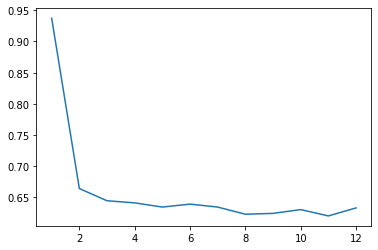

In [118]:
xs = range(1,13)
plt.plot(xs, [accs[k] for k in xs])

entropies = pd.read_csv("../../results/ring_mondrian/entropies.csv")

In [120]:
m = max(entropies["cond_entropy"])
entropies["cond_entropy"] = entropies["cond_entropy"]/m

In [121]:
entropies

,k_val,cond_entropy
0,1,0.000000
1,2,0.987586
2,3,0.990896
3,4,0.994319
4,5,0.995486
5,6,0.995486
6,7,0.995502
7,8,0.999981
8,9,1.000000
9,10,1.000000


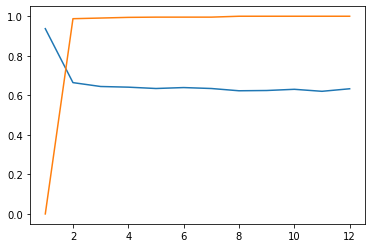

In [122]:
plt.plot(xs, [accs[k] for k in xs])
plt.plot(xs, entropies["cond_entropy"])